## RainFall Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Rainfall.csv")

In [3]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [5]:
df["rainfall"].value_counts()

yes    249
no     117
Name: rainfall, dtype: int64

In [6]:
df.shape

(366, 12)

#### flow == machine learning -> mlflow

In [7]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [10]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

#### see above column names have some spaces. we should remove this spaces

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

### Drop `day` Column

In [13]:
df = df.drop(columns=["day"])

In [14]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


### Checking Missing Values

In [15]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [16]:
df["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [17]:
df["windspeed"].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

### Replacing Missing Values with `mode` value

In [18]:
df["winddirection"].mode()[0]

20.0

In [19]:
df["winddirection"] = df["winddirection"].fillna(df["winddirection"].mode()[0])

In [20]:
df["winddirection"].isnull().sum()

0

#### Replacing Missing Values with `median` value

In [21]:
df["windspeed"].median()

20.5

In [22]:
df["windspeed"] = df["windspeed"].fillna(df["windspeed"].median())

In [23]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [24]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [25]:
df["rainfall"].unique()

array(['yes', 'no'], dtype=object)

### Encoding the Target Column

In [26]:
df["rainfall"] = df["rainfall"].map({"yes":1, "no":0})

In [27]:
df.head(3)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2


In [28]:
df.info() #rainfall data type also changed after encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


## EDA

### Numerical Features Distribution

In [29]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

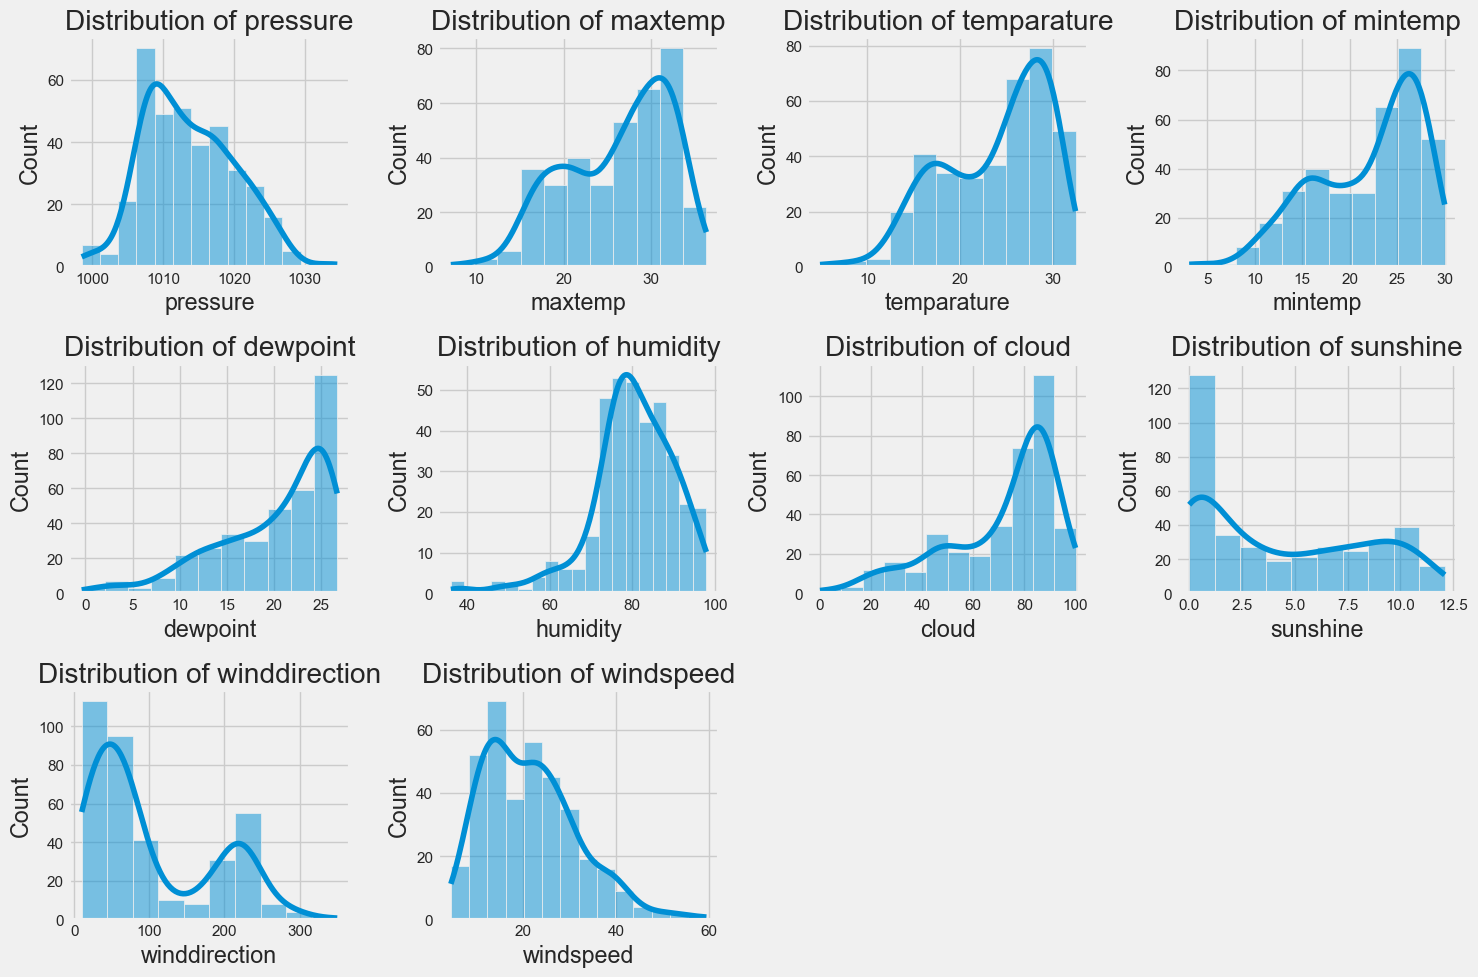

<Figure size 640x480 with 0 Axes>

In [32]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize = (15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde = True)
    plt.title(f"Distribution of {column}")
    
plt.tight_layout()
plt.show()
#plt.savefig(fname = "pngg")

### Check target column data imbalance

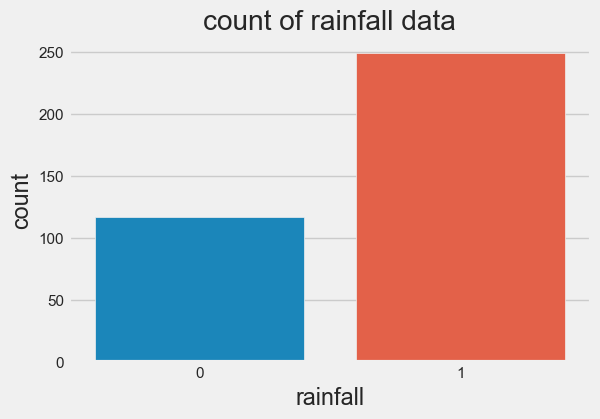

In [31]:
plt.figure(figsize = (6, 4))
sns.countplot(x = "rainfall", data = df)
plt.title("count of rainfall data")
plt.show()

* so far we did
* Handling Missing Values: used mode and mean
* categorical: convert into numerical => rainfall with map method
* kde: hist plot
* imbalance => will apply SMOTE(OVER sample, upper sample)
* feature engineering => correlation
* Outlier ==> Box plot

## Correlation Map

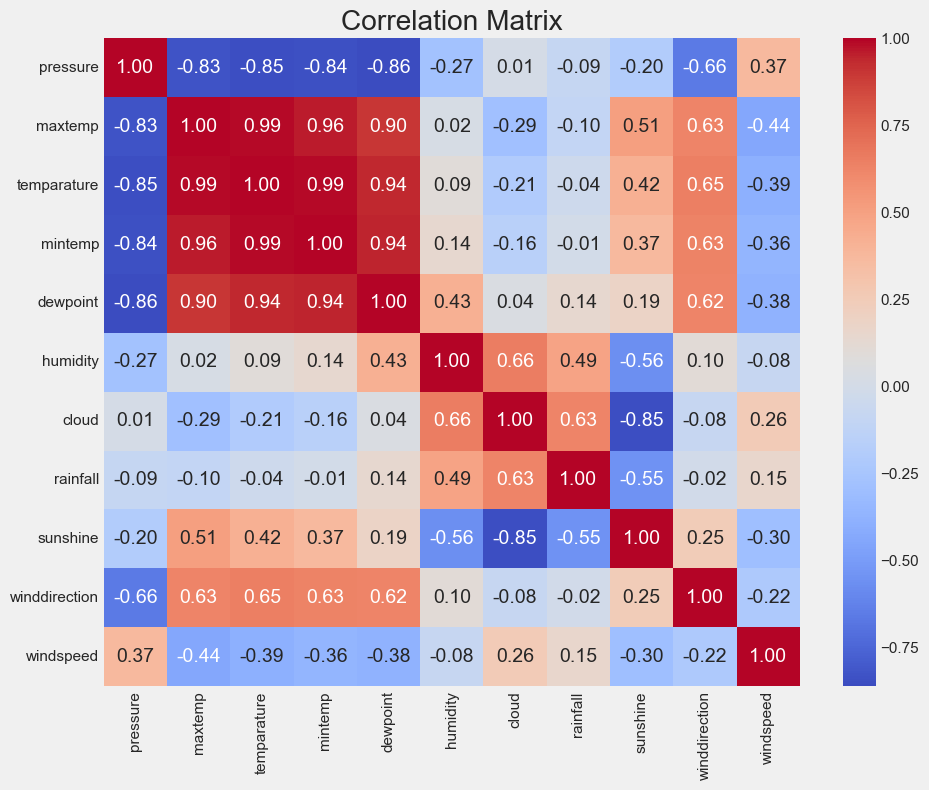

In [32]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", fmt =".2f" )
plt.title("Correlation Matrix")
plt.show()

## Boxplot for Outliers

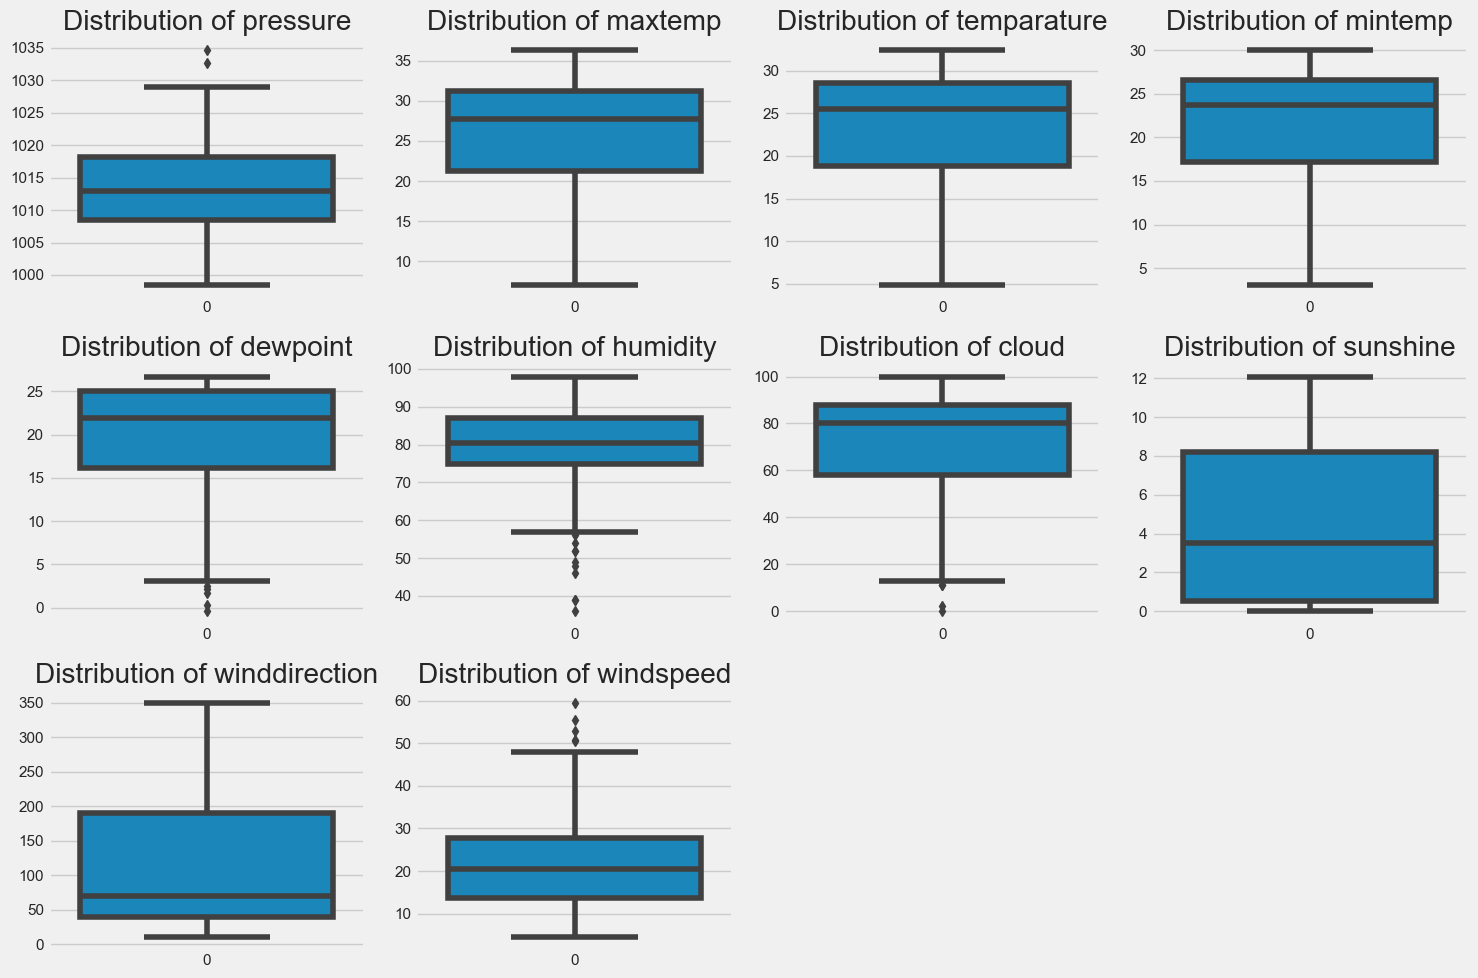

In [33]:
columns = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed']

plt.figure(figsize = (15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df[column])
    plt.title(f"Distribution of {column}")
    
plt.tight_layout()
plt.show()

## Removing Higly correlated features based on heat map

In [34]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

In [35]:
df = df.drop(columns=["mintemp","temparature","maxtemp"])

In [36]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


## Checking Data imbalance

In [37]:
df["rainfall"].value_counts()

1    249
0    117
Name: rainfall, dtype: int64

In [38]:
df_majority = df[df["rainfall"] == 1 ]
df_minority = df[df["rainfall"] == 0 ]

## Down Sampling

In [39]:
df_majority.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [40]:
df_majority.shape

(249, 8)

In [41]:
df_minority.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
6,1021.8,15.0,79,56,0,3.4,30.0,21.5
7,1020.8,14.4,78,28,0,7.7,60.0,14.3
8,1020.6,14.3,78,79,0,3.3,70.0,39.3
11,1019.9,13.7,79,86,0,0.6,20.0,23.9
12,1020.8,12.1,77,34,0,9.1,30.0,24.4


In [42]:
down_sample_indices = np.random.choice(df_majority.index, size = len(df_minority), replace = False )

In [43]:
df_majority_down_sampled = df_majority.loc[down_sample_indices]

In [44]:
df_majority_down_sampled.shape

(117, 8)

In [45]:
df_down_sampled = pd.concat([df_majority_down_sampled, df_minority])

In [46]:
df_down_sampled = df_down_sampled.sample(frac=1, random_state=42).reset_index(drop = True)

In [47]:
df_down_sampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.0,15.6,81,83,1,0.6,50.0,15.3
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1013.3,20.8,91,78,1,1.0,40.0,14.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [48]:
df_down_sampled.rainfall.value_counts()

1    117
0    117
Name: rainfall, dtype: int64

# Model Building

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [50]:
X = df_down_sampled.drop(columns = ["rainfall"] )
y = df_down_sampled["rainfall"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparameter Tuning

In [52]:
rfc = RandomForestClassifier(random_state=42)

param_grid_rfc = {
    "n_estimators":[50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth":[None, 10, 20, 30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf" : [1, 2,4]
    
}

In [53]:
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5, n_jobs=-1, verbose=2)

In [54]:
grid_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [55]:
best_rfc_model = grid_search_rfc.best_estimator_

In [56]:
best_rfc_model

RandomForestClassifier(min_samples_leaf=4, n_estimators=200, random_state=42)

In [57]:
grid_search_rfc.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [58]:
cv_score = cross_val_score(best_rfc_model, X_train, y_train, cv=5)

In [59]:
cv_score

array([0.73684211, 0.76315789, 0.89189189, 0.81081081, 0.83783784])

In [60]:
np.mean(cv_score)

0.8081081081081083

In [61]:
y_pred = best_rfc_model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.6808510638297872

In [63]:
confusion_matrix(y_test, y_pred)

array([[15,  9],
       [ 6, 17]], dtype=int64)

In [64]:
print(f"classification report: \n", classification_report(y_test, y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.67        24
           1       0.65      0.74      0.69        23

    accuracy                           0.68        47
   macro avg       0.68      0.68      0.68        47
weighted avg       0.68      0.68      0.68        47



In [65]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

In [66]:
report_dict

{'0': {'precision': 0.7142857142857143,
  'recall': 0.625,
  'f1-score': 0.6666666666666666,
  'support': 24.0},
 '1': {'precision': 0.6538461538461539,
  'recall': 0.7391304347826086,
  'f1-score': 0.693877551020408,
  'support': 23.0},
 'accuracy': 0.6808510638297872,
 'macro avg': {'precision': 0.6840659340659341,
  'recall': 0.6820652173913043,
  'f1-score': 0.6802721088435373,
  'support': 47.0},
 'weighted avg': {'precision': 0.6847089081131634,
  'recall': 0.6808510638297872,
  'f1-score': 0.6799826313504124,
  'support': 47.0}}

## why dictonary above output. because we need to passing this data into `mlflow`

# mlflow

In [67]:
#!pip install mlflow

In [69]:
import mlflow
import mlflow.sklearn

In [70]:
report_dict

{'0': {'precision': 0.7142857142857143,
  'recall': 0.625,
  'f1-score': 0.6666666666666666,
  'support': 24.0},
 '1': {'precision': 0.6538461538461539,
  'recall': 0.7391304347826086,
  'f1-score': 0.693877551020408,
  'support': 23.0},
 'accuracy': 0.6808510638297872,
 'macro avg': {'precision': 0.6840659340659341,
  'recall': 0.6820652173913043,
  'f1-score': 0.6802721088435373,
  'support': 47.0},
 'weighted avg': {'precision': 0.6847089081131634,
  'recall': 0.6808510638297872,
  'f1-score': 0.6799826313504124,
  'support': 47.0}}

In [73]:
mlflow.set_experiment("Rainfall1")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

with mlflow.start_run():
    mlflow.log_params(grid_search_rfc.best_params_)
    mlflow.log_metrics({
        "accuracy":report_dict['accuracy'],
        "recall_class_0":report_dict['0']['recall'],
        "recall_class_1":report_dict['1']['recall'],
        "f1_score_macro":report_dict['macro avg']['f1-score']
    })
    
    mlflow.sklearn.log_model(best_rfc_model, "Random Forest Data")

2024/12/20 11:18:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run chill-mole-921 at: http://127.0.0.1:5000/#/experiments/117756516744359968/runs/fb7908b811af4fdb963782fc0a10c17f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/117756516744359968


## We should register our model in MLflow

In [74]:
model_name = "Random Forest Data"
run_id = "fb7908b811af4fdb963782fc0a10c17f"
model_uri = f'runs:/{run_id}/{model_name}'


with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name=model_name)    

Successfully registered model 'Random Forest Data'.
2024/12/20 12:42:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Data, version 1


🏃 View run chill-mole-921 at: http://127.0.0.1:5000/#/experiments/117756516744359968/runs/fb7908b811af4fdb963782fc0a10c17f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/117756516744359968


Created version '1' of model 'Random Forest Data'.


# Make Predictions

In [75]:
import mlflow
logged_model = 'runs:/fb7908b811af4fdb963782fc0a10c17f/Random Forest Data'

# Load model.
loaded_model = mlflow.sklearn.load_model(logged_model)

# Predict on a Test Data.
loaded_model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [77]:
loaded_model

RandomForestClassifier(min_samples_leaf=4, n_estimators=200, random_state=42)

In [78]:
current_model_uri = f"models:/{model_name}@challenger"
production_name = "rainfall-prediction-production"
client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_name)

Successfully registered model 'rainfall-prediction-production'.
Copied version '1' of model 'Random Forest Data' to version '1' of model 'rainfall-prediction-production'.


<ModelVersion: aliases=[], creation_timestamp=1734685626620, current_stage='None', description='', last_updated_timestamp=1734685626620, name='rainfall-prediction-production', run_id='fb7908b811af4fdb963782fc0a10c17f', run_link='', source='models:/Random Forest Data/1', status='READY', status_message='', tags={}, user_id='', version='1'>

# Production Model

In [79]:
model_version = 1
prod_model_uri = f"models:/{production_name}@champion"

loaded_model = mlflow.sklearn.load_model(prod_model_uri)
y_pred = loaded_model.predict(X_test)

In [80]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

# Build Predictive System

In [82]:
input_df = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_df], ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

In [83]:
prediction = loaded_model.predict(input_df)

In [85]:
print("Prediction Result: ", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction Result:  Rainfall
